<a href="https://colab.research.google.com/github/thanhcdt1820/Kiemtragiuaky/blob/main/Fingerprintipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def save_data(root_folder):

    dest_size = (150, 150)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    images.append(cv.resize(cv.imread(root_folder + '/' + folder +"/" + file), dsize=(150, 150)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/Colab Notebooks/vantay.data', 'wb')
    pickle.dump((images,labels), file)
    file.close()

save_data('/content/drive/MyDrive/Colab Notebooks/Vantay/vantay')

Bắt đầu xử lý ảnh...
Folder = Dan
Folder = Phat
Folder = Nhut
Folder = Thanh
Folder = Tan
Folder = Cuong
[[0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/vantay.data', 'rb')

    
    (pixels, labels) = pickle.load(file)

    
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(1458, 150, 150, 3)
(1458, 6)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(1166, 150, 150, 3)

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
# model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
# model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                  

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=aug.flow(X_test,y_test, batch_size=64))

Epoch 1/30


<ipython-input-13-631295784de2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=aug.flow(X_test,y_test, batch_size=64))


37/37 [==============================] - 27s 441ms/step - loss: 1.9092 - accuracy: 0.2899 - val_loss: 1.7375 - val_accuracy: 0.3288
Epoch 2/30
37/37 [==============================] - 9s 230ms/step - loss: 1.7505 - accuracy: 0.2959 - val_loss: 1.7192 - val_accuracy: 0.3288
Epoch 3/30
37/37 [==============================] - 9s 226ms/step - loss: 1.7447 - accuracy: 0.2959 - val_loss: 1.7163 - val_accuracy: 0.3288
Epoch 4/30
37/37 [==============================] - 10s 259ms/step - loss: 1.7437 - accuracy: 0.2959 - val_loss: 1.7199 - val_accuracy: 0.3288
Epoch 5/30
37/37 [==============================] - 10s 257ms/step - loss: 1.7428 - accuracy: 0.2959 - val_loss: 1.7178 - val_accuracy: 0.3288
Epoch 6/30
37/37 [==============================] - 9s 229ms/step - loss: 1.7420 - accuracy: 0.2959 - val_loss: 1.7228 - val_accuracy: 0.3288
Epoch 7/30
37/37 [==============================] - 10s 279ms/step - loss: 1.7440 - accuracy: 0.2959 - val_loss: 1.7214 - val_accuracy: 0.3288
Epoch 8/30
37

In [ ]:
model.save('/content/drive/MyDrive/Vantays/Vantay_6.h5')

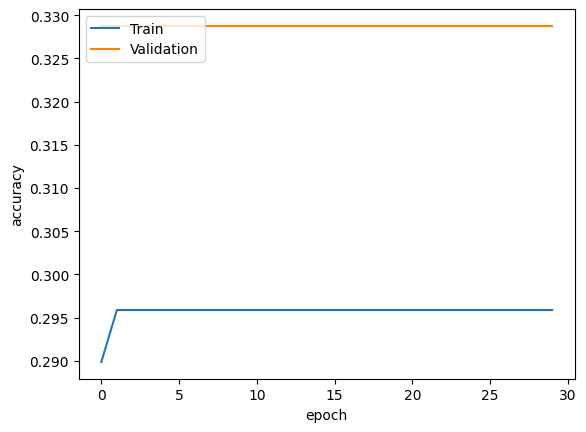

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

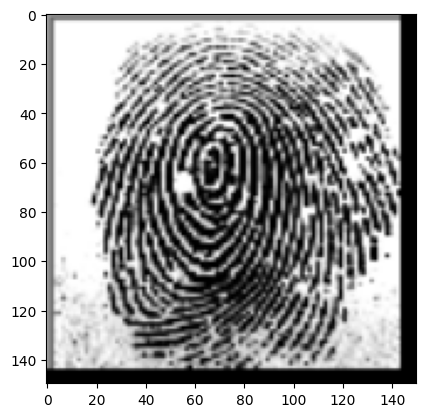

1/1 [==============================] - 0s 19ms/step
[[0.13217817 0.14807573 0.14222854 0.14715213 0.29504234 0.13532309]]
This picture is:  Tan [0.13217817 0.14807573 0.14222854 0.14715213 0.29504234 0.13532309]
0.29504234


In [ ]:
class_name = ['Dan','Phat','Nhut','Thanh','Tan','Cuong']
image = X[100]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[100]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

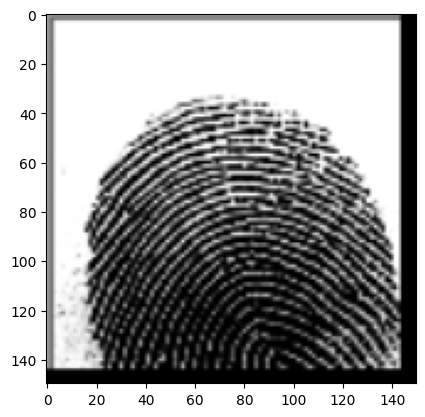

1/1 [==============================] - 0s 21ms/step
[[0.13217807 0.1480758  0.14222857 0.14715204 0.29504225 0.13532326]]
This picture is:  Tan [0.13217807 0.1480758  0.14222857 0.14715204 0.29504225 0.13532326]
0.29504225


In [ ]:
class_name = ['Dan','Phat','Nhut','Thanh','Tan','Cuong']
image = X[64]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[64]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

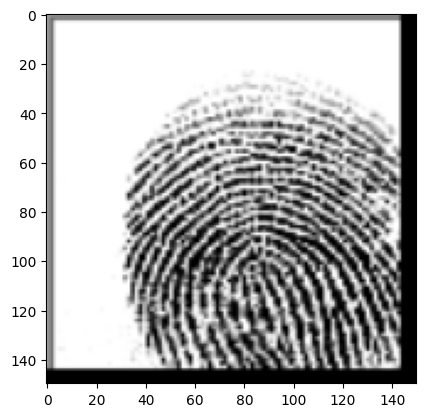

1/1 [==============================] - 0s 35ms/step
[[0.13217825 0.1480759  0.14222862 0.14715211 0.29504192 0.13532318]]
This picture is:  Tan [0.13217825 0.1480759  0.14222862 0.14715211 0.29504192 0.13532318]
0.29504192


In [ ]:
class_name = ['Dan','Phat','Nhut','Thanh','Tan','Cuong']
image = X[34]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[34]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))